In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

import plotly.express as px
import numpy as np
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
assessments = pd.read_csv('./static/datasets/assessments.csv')
courses = pd.read_csv('./static/datasets/courses.csv')
studentAssessment = pd.read_csv('./static/datasets/studentAssessment.csv')
studentInfo = pd.read_csv('./static/datasets/studentInfo.csv')
studentRegistration = pd.read_csv('./static/datasets/studentRegistration.csv')
vle = pd.read_csv('./static/datasets/vle.csv')

In [3]:
# column identification
set1 = list(assessments.columns.values)
set2 = list(courses.columns.values)
set3 = list(studentAssessment.columns.values)
set4 = list(studentInfo.columns.values)
set5 = list(studentRegistration.columns.values)
set6 = list(vle.columns.values)

In [4]:
all_columns = [set1, set2, set3, set4, set5, set6]
columns_count = [assessments.shape, courses.shape, studentAssessment.shape,
                 studentInfo.shape, studentRegistration.shape, vle.shape]
columns_header = ['assessments', 'courses', 'studentAssessment',
                  'studentInfo', 'studentRegistration', 'vle']

In [5]:
d = {'Table Name': columns_header, 'Rows, Columns': columns_count, 'Column Names': all_columns}
df = pd.set_option('max_colwidth', 200)
df = pd.DataFrame(d)
df

,Table Name,"Rows, Columns",Column Names
0,assessments,"(206, 6)","[code_module, code_presentation, id_assessment, assessment_type, date, weight]"
1,courses,"(22, 3)","[code_module, code_presentation, module_presentation_length]"
2,studentAssessment,"(173912, 5)","[id_assessment, id_student, date_submitted, is_banked, score]"
3,studentInfo,"(32593, 12)","[code_module, code_presentation, id_student, gender, region, highest_education, imd_band, age_band, num_of_prev_attempts, studied_credits, disability, final_result]"
4,studentRegistration,"(32593, 5)","[code_module, code_presentation, id_student, date_registration, date_unregistration]"
5,vle,"(6364, 6)","[id_site, code_module, code_presentation, activity_type, week_from, week_to]"


In [6]:
# Cleaning the data
# Dropping all the missing values
assessments.dropna(inplace=True)
courses.dropna(inplace=True)
studentAssessment.dropna(inplace=True)
studentInfo.dropna(inplace=True)
studentRegistration.dropna(inplace=True)
vle.dropna(inplace=True)

In [7]:
columns_count = [assessments.shape, courses.shape, studentAssessment.shape,
                 studentInfo.shape, studentRegistration.shape, vle.shape]
d = {'Table Name': columns_header, 'Rows, Columns': columns_count,
     'Column Names': all_columns}
df = pd.set_option('max_colwidth', 200)
df = pd.DataFrame(d)
df

,Table Name,"Rows, Columns",Column Names
0,assessments,"(195, 6)","[code_module, code_presentation, id_assessment, assessment_type, date, weight]"
1,courses,"(22, 3)","[code_module, code_presentation, module_presentation_length]"
2,studentAssessment,"(173739, 5)","[id_assessment, id_student, date_submitted, is_banked, score]"
3,studentInfo,"(31482, 12)","[code_module, code_presentation, id_student, gender, region, highest_education, imd_band, age_band, num_of_prev_attempts, studied_credits, disability, final_result]"
4,studentRegistration,"(10033, 5)","[code_module, code_presentation, id_student, date_registration, date_unregistration]"
5,vle,"(1121, 6)","[id_site, code_module, code_presentation, activity_type, week_from, week_to]"


In [8]:
# Exporting the data
assessments.to_csv(r'./static/datasets/preprocessed_csv/pre_assessments.csv', index=False)
courses.to_csv(r'./static/datasets/preprocessed_csv/pre_courses.csv', index=False)
studentAssessment.to_csv(r'./static/datasets/preprocessed_csv/pre_studentAssessment.csv', index=False)
studentInfo.to_csv(r'./static/datasets/preprocessed_csv/pre_studentInfo.csv', index=False)
studentRegistration.to_csv(r'./static/datasets/preprocessed_csv/pre_studentRegistration.csv', index=False)
vle.to_csv(r'./static/datasets/preprocessed_csv/pre_vle.csv', index=False)

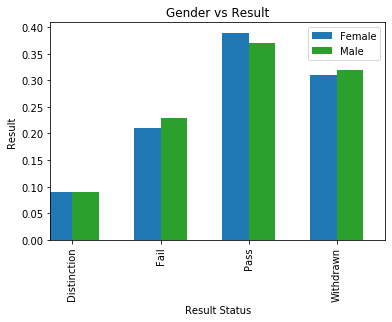

In [9]:
# Results based on Gender

gender = studentInfo.groupby(['gender'],as_index = False)
gender_count = gender['id_student'].count()
result_gender = studentInfo.groupby(['gender', 'final_result'],as_index = False)
result_gender_count = result_gender['id_student'].count()

merge = pd.merge(gender_count, result_gender_count, on = 'gender', how = 'left')
merge['i'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['gender','final_result', 'i']]

female = merge.loc[merge['gender'] == 'F']
male = merge.loc[merge['gender'] == 'M']

fig = plt.figure() 

ax = fig.add_subplot(111) 

female.set_index('final_result',drop=True,inplace=True)
male.set_index('final_result',drop=True,inplace=True)
female.plot(kind='bar', ax=ax, width= 0.3, position=1)
male.plot(kind='bar', color='#2ca02c', ax=ax, width= 0.3, position=0)

plt.xlabel('Result Status')
plt.ylabel('Result')
plt.title('Gender vs Result')
plt.legend(['Female', 'Male'])
plt.show()

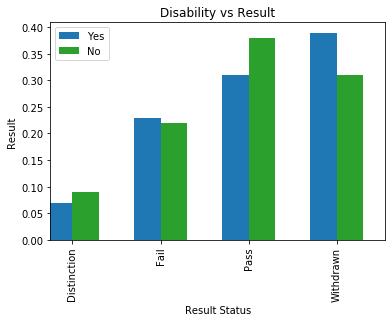

In [10]:
#Results based on Diasability

disability_ = studentInfo.groupby(['disability'],as_index = False)
disability_count = disability_['id_student'].count()
result_disability = studentInfo.groupby(['disability', 'final_result'],as_index = False)
result_disability_count = result_disability['id_student'].count()

merge = pd.merge(disability_count, result_disability_count, on = 'disability', how = 'left')
merge['i'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['disability','final_result', 'i']]

yes = merge.loc[merge['disability'] == 'Y']
no = merge.loc[merge['disability'] == 'N']

fig = plt.figure() 

ax = fig.add_subplot(111) 

yes.set_index('final_result',drop=True,inplace=True)
no.set_index('final_result',drop=True,inplace=True)
yes.plot(kind='bar', ax=ax, width= 0.3, position=1)
no.plot(kind='bar', color='#2ca02c', ax=ax, width= 0.3, position=0)

plt.xlabel('Result Status')
plt.ylabel('Result')
plt.title('Disability vs Result')
plt.legend(['Yes', 'No'])
plt.show()

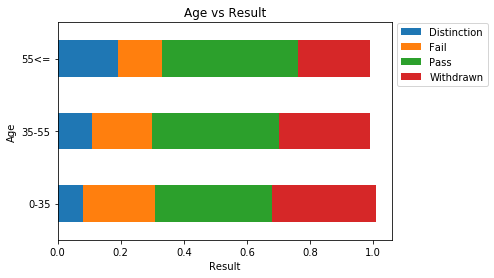

In [11]:
#Results based on Age

age = studentInfo.groupby(['age_band'],as_index = False)
age_count = age['id_student'].count()
result_age = studentInfo.groupby(['age_band', 'final_result'],as_index = False)
result_age_count = result_age['id_student'].count()

merge = pd.merge(age_count, result_age_count, on = 'age_band', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['age_band','final_result', '_']]

merge.set_index(['age_band','final_result']).unstack().plot(kind = 'barh', stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Age')
plt.xlabel('Result')
plt.title('Age vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

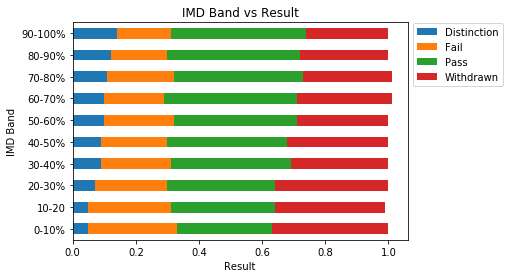

In [12]:


#Results based on IMD Band

import pandas as pd

imd = studentInfo.groupby(['imd_band'],as_index = False)
imd_count = imd['id_student'].count()
result_imd = studentInfo.groupby(['imd_band', 'final_result'],as_index = False)
result_imd_count = result_imd['id_student'].count()

merge = pd.merge(imd_count, result_imd_count , on = 'imd_band', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['imd_band','final_result', '_']]

merge.set_index(['imd_band','final_result']).unstack().plot(kind="barh", stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('IMD Band')
plt.xlabel('Result')
plt.title('IMD Band vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

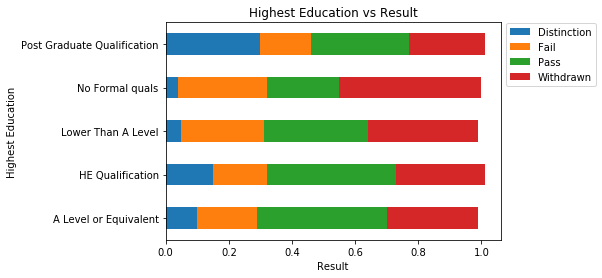

In [13]:
#Results based on Highest Education

education = studentInfo.groupby(['highest_education'],as_index = False)
education_count = education['id_student'].count()
result_education = studentInfo.groupby(['highest_education', 'final_result'],as_index = False)
result_education_count = result_education['id_student'].count()

merge = pd.merge(education_count, result_education_count , on = 'highest_education', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['highest_education','final_result', '_']]

merge.set_index(['highest_education','final_result']).unstack().plot(kind = 'barh', stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Highest Education')
plt.xlabel('Result')
plt.title('Highest Education vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

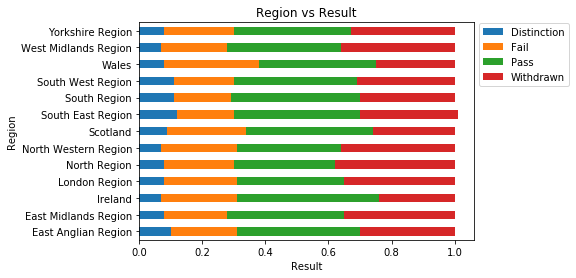

In [14]:
#Results based on Region

import pandas as pd

region = studentInfo.groupby(['region'],as_index = False)
region_count = region['id_student'].count()
result_region = studentInfo.groupby(['region', 'final_result'],as_index = False)
result_region_count = result_region['id_student'].count()

merge = pd.merge(region_count, result_region_count , on = 'region', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['region','final_result', '_']]

merge.set_index(['region','final_result']).unstack().plot(kind="barh", stacked=True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Region')
plt.xlabel('Result')
plt.title('Region vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

In [15]:
# Predictive Models
dfs = [studentAssessment, studentInfo, studentRegistration]
df_final = reduce(lambda left,right: pd.merge(left,right,on='id_student'), dfs)
df_final['final_result'].value_counts()

Withdrawn      32158
Pass            8643
Fail            4406
Distinction     1203
Name: final_result, dtype: int64

In [16]:
df_final = df_final.drop(['date_unregistration'],axis =1) # too many NaN values

In [17]:
df_final.dropna(inplace=True)
df_final['final_result'].value_counts()

Withdrawn      32158
Pass            8643
Fail            4406
Distinction     1203
Name: final_result, dtype: int64

In [18]:
df_final.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module_x,code_presentation_x,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_y,code_presentation_y,date_registration
0,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,AAA,2013J,-180.0
1,1752,65002,17,0,66.0,AAA,2014J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,1,60,N,Fail,AAA,2013J,-180.0
2,1753,65002,51,0,68.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,AAA,2013J,-180.0
3,1753,65002,51,0,68.0,AAA,2014J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,1,60,N,Fail,AAA,2013J,-180.0
4,1758,65002,-1,1,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,AAA,2013J,-180.0


In [19]:
# Converting the final table to catgorical data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_final = df_final.apply(le.fit_transform)

In [20]:
# Decision Tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(xTrain, yTrain)
train_pred = dt.predict(xTrain)
test_pred = dt.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

Accuracy:0.956 



In [21]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=0, loss='huber')
gb = gb.fit(xTrain, yTrain)
print("Accuracy:{0:.3f}".format(gb.score(xTest, yTest)))

Accuracy:0.895


In [22]:
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

rf = RandomForestClassifier(n_estimators=10,random_state=33)
rf = rf.fit(xTrain, yTrain)
train_pred = rf.predict(xTrain)
test_pred = rf.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

Accuracy:0.973 



In [23]:
# Model Accuracy

# Function to plot accuracy

from sklearn.model_selection import learning_curve
import numpy as np

def plot_accuracy(model):

    train_sizes, train_scores, test_scores = learning_curve(model, xTrain, yTrain, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.gca().invert_yaxis()
    plt.grid()
    plt.ylim(0.0, 1.1)
    plt.title("Accuracy Plot")
    plt.xlabel("Testing")
    plt.ylabel("Accuracy %")

    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
        
    plt.plot(train_sizes, test_mean, 'bo-', color = "r", label="Test Score")

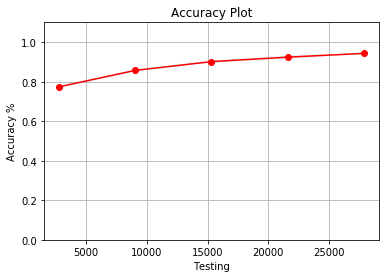

In [24]:
#Decision Tree
plot_accuracy(dt)

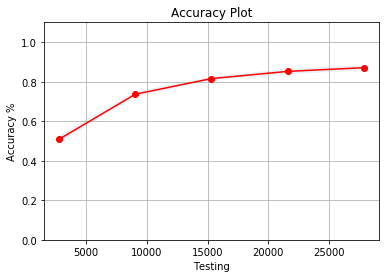

In [25]:
#Gradient Boosting
plot_accuracy(gb)

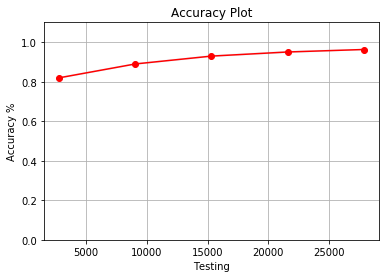

In [26]:
#Random Forest
plot_accuracy(rf)

Normalized Confusion Matrix
[[0.53650794 0.06984127 0.27301587 0.12063492]
 [0.02677029 0.582038   0.2029361  0.18825561]
 [0.03657999 0.09167034 0.73953283 0.13221684]
 [0.00318026 0.02467879 0.02976721 0.94237374]]


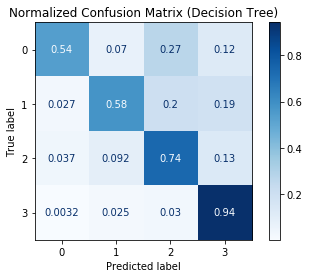

In [34]:
#Decision Tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(dt, xTest, yTest)

disp = plot_confusion_matrix(dt, xTest, y_pred,
                             cmap=plt.cm.Blues,
                             normalize='true')
disp.ax_.set_title('Normalized Confusion Matrix (Decision Tree)')

print('Normalized Confusion Matrix')
print(disp.confusion_matrix)

Normalized Confusion Matrix (Random Forest)
[[0.77339901 0.01970443 0.15763547 0.04926108]
 [0.01079914 0.74298056 0.13714903 0.10907127]
 [0.03010033 0.06605351 0.82399666 0.0798495 ]
 [0.00309329 0.02474635 0.02697352 0.94518683]]


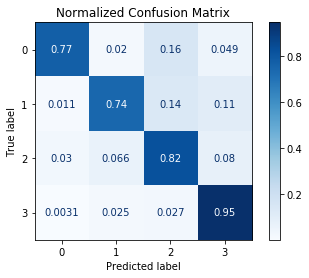

In [36]:
#Random Forest
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(rf, xTest, yTest)

disp = plot_confusion_matrix(rf, xTest, y_pred,
                             cmap=plt.cm.Blues,
                             normalize='true')
disp.ax_.set_title('Normalized Confusion Matrix')

print('Normalized Confusion Matrix (Random Forest)')
print(disp.confusion_matrix)